In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
epl_players=pd.read_csv("epl_players.csv", parse_dates=["birthday","date"])
matches=pd.read_csv("epl_matches_train.csv", parse_dates=["date"])
goals=pd.read_csv("epl_goals.csv")
pot_goals=pd.read_csv("epl_potential_shots.csv")
epl_players.shape

(32733, 41)

In [3]:
epl_players.head()

,player_id,birthday,height,weight,date,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,155782,1989-12-15,170.18,146.0,2016-04-21,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
1,155782,1989-12-15,170.18,146.0,2016-04-07,left,high,medium,80.0,53.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
2,155782,1989-12-15,170.18,146.0,2016-01-07,left,high,medium,79.0,52.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
3,155782,1989-12-15,170.18,146.0,2015-12-24,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
4,155782,1989-12-15,170.18,146.0,2015-12-17,left,high,medium,79.0,51.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


# Taking filter for epl season 2014/2015.

In [4]:
data=epl_players[(epl_players["date"]>"2014-07-30") & (epl_players["date"]<"2015-05-31")]

In [5]:
data["age"]=round((datetime.now()-epl_players["birthday"]).dt.days/365)

In [6]:
data.drop(["birthday","date","preferred_foot"], axis=1, inplace=True)
data.head(10)

,player_id,height,weight,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
8,155782,170.18,146.0,medium,medium,78.0,50.0,56.0,69.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
9,155782,170.18,146.0,medium,medium,78.0,50.0,56.0,69.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
10,155782,170.18,146.0,medium,medium,78.0,50.0,56.0,69.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
11,155782,170.18,146.0,medium,medium,77.0,50.0,51.0,67.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
35,23780,182.88,154.0,medium,medium,45.0,33.0,72.0,64.0,32.0,...,44.0,72.0,70.0,68.0,7.0,5.0,15.0,11.0,10.0,41.0
36,23780,182.88,154.0,medium,medium,45.0,33.0,72.0,64.0,32.0,...,44.0,72.0,70.0,68.0,7.0,5.0,15.0,11.0,10.0,41.0
37,23780,182.88,154.0,medium,medium,45.0,33.0,72.0,64.0,32.0,...,44.0,74.0,71.0,69.0,7.0,5.0,15.0,11.0,10.0,41.0
38,23780,182.88,154.0,medium,medium,45.0,33.0,72.0,64.0,32.0,...,44.0,78.0,72.0,74.0,7.0,5.0,15.0,11.0,10.0,41.0
62,30895,165.10,139.0,high,medium,78.0,65.0,27.0,77.0,67.0,...,61.0,29.0,33.0,34.0,13.0,6.0,6.0,15.0,10.0,34.0
63,30895,165.10,139.0,high,medium,78.0,65.0,27.0,77.0,67.0,...,61.0,25.0,23.0,25.0,13.0,6.0,6.0,15.0,10.0,34.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4991 entries, 8 to 32702
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            4991 non-null   int64  
 1   height               4985 non-null   float64
 2   weight               4985 non-null   float64
 3   attacking_work_rate  4985 non-null   object 
 4   defensive_work_rate  4985 non-null   object 
 5   crossing             4985 non-null   float64
 6   finishing            4985 non-null   float64
 7   heading_accuracy     4985 non-null   float64
 8   short_passing        4985 non-null   float64
 9   volleys              4985 non-null   float64
 10  dribbling            4985 non-null   float64
 11  curve                4985 non-null   float64
 12  free_kick_accuracy   4985 non-null   float64
 13  long_passing         4985 non-null   float64
 14  ball_control         4985 non-null   float64
 15  acceleration         4985 non-null   

#### Droping NAN values as there are 6 rows with missing values.

In [8]:
data.dropna(inplace=True)
data.shape

(4985, 39)

#### Mapping high, medium and low workrate to 3,2,1

In [9]:
work_rate={"high":3,"medium":2,"low":1}
data["attacking_work_rate"]=data["attacking_work_rate"].map(work_rate)
data["defensive_work_rate"]=data["defensive_work_rate"].map(work_rate)
data.head()

,player_id,height,weight,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
8,155782,170.18,146.0,2.0,2.0,78.0,50.0,56.0,69.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
9,155782,170.18,146.0,2.0,2.0,78.0,50.0,56.0,69.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
10,155782,170.18,146.0,2.0,2.0,78.0,50.0,56.0,69.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
11,155782,170.18,146.0,2.0,2.0,77.0,50.0,51.0,67.0,28.0,...,58.0,73.0,72.0,72.0,13.0,6.0,8.0,8.0,11.0,31.0
35,23780,182.88,154.0,2.0,2.0,45.0,33.0,72.0,64.0,32.0,...,44.0,72.0,70.0,68.0,7.0,5.0,15.0,11.0,10.0,41.0


## Taking only players who have played atleast 5 matches during the season.

In [10]:
counts=data["player_id"].value_counts()
df=data[data['player_id'].isin(counts[counts>=5].index)]

### Taking mean of all the attributes for different player id.

In [11]:
players=round(df.groupby("player_id").mean())

In [12]:
players=pd.DataFrame(players).reset_index()
players.head()

,player_id,height,weight,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age
0,18506,175.0,168.0,3.0,1.0,67.0,79.0,58.0,71.0,77.0,...,73.0,31.0,36.0,32.0,6.0,15.0,15.0,5.0,11.0,34.0
1,18859,185.0,165.0,3.0,2.0,58.0,77.0,79.0,65.0,67.0,...,69.0,40.0,36.0,37.0,6.0,13.0,5.0,6.0,13.0,36.0
2,19243,188.0,187.0,3.0,2.0,63.0,90.0,82.0,65.0,81.0,...,76.0,28.0,39.0,34.0,11.0,13.0,12.0,8.0,11.0,32.0
3,20694,175.0,168.0,3.0,3.0,67.0,79.0,78.0,73.0,73.0,...,66.0,31.0,42.0,32.0,9.0,5.0,13.0,5.0,5.0,35.0
4,22543,178.0,159.0,3.0,2.0,55.0,89.0,93.0,69.0,90.0,...,87.0,25.0,42.0,25.0,10.0,13.0,6.0,9.0,5.0,35.0


In [13]:
matches.head()

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,...,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_team_goal,away_team_goal
0,2008/2009,1,2008-08-17,49337,10260,10261,1,2,4,6,...,0,0,24,9,6,6,55.0,45.0,1,1
1,2008/2009,1,2008-08-16,38136,9825,8659,1,2,4,6,...,0,0,21,7,7,5,66.0,34.0,1,0
2,2008/2009,1,2008-08-16,43276,8472,8650,1,2,4,6,...,0,0,15,19,1,8,46.0,54.0,0,1
3,2008/2009,1,2008-08-16,40671,8654,8528,1,2,4,6,...,0,0,15,27,6,10,52.0,48.0,2,1
4,2008/2009,1,2008-08-17,34633,10252,8456,1,2,4,6,...,0,0,16,16,7,8,52.0,48.0,4,2


## Merging epl goals table with matches table to filter goals scored by different players during epl season 2014/2015.

In [14]:
matches_df=matches[["match_id","date"]]

In [15]:
goals.head()

,match_id,team_id,goal_number,player1_id,player2_id,goal_type
0,49337,10261,1,37799.0,38807.0,header
1,49337,10260,2,24148.0,24154.0,shot
2,38136,9825,1,26181.0,39297.0,shot
3,43276,8650,1,30853.0,30889.0,distance
4,40671,8654,1,23139.0,36394.0,shot


In [16]:
goals=goals.merge(matches_df, on=["match_id"],how="left")
goals.head()

,match_id,team_id,goal_number,player1_id,player2_id,goal_type,date
0,49337,10261,1,37799.0,38807.0,header,2008-08-17
1,49337,10260,2,24148.0,24154.0,shot,2008-08-17
2,38136,9825,1,26181.0,39297.0,shot,2008-08-16
3,43276,8650,1,30853.0,30889.0,distance,2008-08-16
4,40671,8654,1,23139.0,36394.0,shot,2008-08-16


In [17]:
goals=goals[(goals["date"]>"2014-07-30") & (goals["date"]<"2015-05-31")]

### No of goals and assist by different players from the goals table and merging with the players table.

In [18]:
no_of_goals=pd.DataFrame(goals["player1_id"].value_counts()).reset_index()
no_of_goals.columns=["player_id","no_of_goals"]
no_of_goals.head()

,player_id,no_of_goals
0,37412.0,27
1,194165.0,24
2,187266.0,21
3,19243.0,20
4,50047.0,17


In [19]:
no_of_assists=pd.DataFrame(goals["player2_id"].value_counts()).reset_index()
no_of_assists.columns=["player_id","no_of_assists"]
no_of_assists.head()

,player_id,no_of_assists
0,30613.0,18
1,37436.0,11
2,46509.0,10
3,157729.0,10
4,156008.0,9


In [20]:
players=players.merge(no_of_goals, on=["player_id"],how="left")
players=players.merge(no_of_assists, on=["player_id"],how="left")
players.fillna(0, inplace=True)
players.head()

,player_id,height,weight,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age,no_of_goals,no_of_assists
0,18506,175.0,168.0,3.0,1.0,67.0,79.0,58.0,71.0,77.0,...,36.0,32.0,6.0,15.0,15.0,5.0,11.0,34.0,2.0,1.0
1,18859,185.0,165.0,3.0,2.0,58.0,77.0,79.0,65.0,67.0,...,36.0,37.0,6.0,13.0,5.0,6.0,13.0,36.0,0.0,0.0
2,19243,188.0,187.0,3.0,2.0,63.0,90.0,82.0,65.0,81.0,...,39.0,34.0,11.0,13.0,12.0,8.0,11.0,32.0,20.0,3.0
3,20694,175.0,168.0,3.0,3.0,67.0,79.0,78.0,73.0,73.0,...,42.0,32.0,9.0,5.0,13.0,5.0,5.0,35.0,0.0,0.0
4,22543,178.0,159.0,3.0,2.0,55.0,89.0,93.0,69.0,90.0,...,42.0,25.0,10.0,13.0,6.0,9.0,5.0,35.0,4.0,4.0


### Similarly adding no of potential goals to players table.

In [21]:
pot_goals=pot_goals.merge(matches_df, on=["match_id"],how="left")
pot_goals.head()

,match_id,team_id,shot_number,player1_id,shot_type,date
0,49337,10260,1,24154.0,blocked_shot,2008-08-17
1,49337,10260,2,24157.0,header,2008-08-17
2,49337,10260,3,30829.0,shot,2008-08-17
3,49337,10260,4,30373.0,shot,2008-08-17
4,49337,10260,5,30373.0,distance,2008-08-17


In [22]:
pot_goals=pot_goals[(pot_goals["date"]>"2014-07-30") & (pot_goals["date"]<"2015-05-31")]

In [23]:
no_of_pot_goals=pd.DataFrame(pot_goals["player1_id"].value_counts()).reset_index()
no_of_pot_goals.columns=["player_id","no_of_potential_goals"]
no_of_pot_goals.head()

,player_id,no_of_potential_goals
0,187266.0,75
1,50047.0,71
2,184536.0,66
3,37412.0,66
4,181276.0,64


In [24]:
players=players.merge(no_of_pot_goals, on=["player_id"],how="left")
players.fillna(0, inplace=True)
players.head()

,player_id,height,weight,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,age,no_of_goals,no_of_assists,no_of_potential_goals
0,18506,175.0,168.0,3.0,1.0,67.0,79.0,58.0,71.0,77.0,...,32.0,6.0,15.0,15.0,5.0,11.0,34.0,2.0,1.0,12.0
1,18859,185.0,165.0,3.0,2.0,58.0,77.0,79.0,65.0,67.0,...,37.0,6.0,13.0,5.0,6.0,13.0,36.0,0.0,0.0,0.0
2,19243,188.0,187.0,3.0,2.0,63.0,90.0,82.0,65.0,81.0,...,34.0,11.0,13.0,12.0,8.0,11.0,32.0,20.0,3.0,29.0
3,20694,175.0,168.0,3.0,3.0,67.0,79.0,78.0,73.0,73.0,...,32.0,9.0,5.0,13.0,5.0,5.0,35.0,0.0,0.0,0.0
4,22543,178.0,159.0,3.0,2.0,55.0,89.0,93.0,69.0,90.0,...,25.0,10.0,13.0,6.0,9.0,5.0,35.0,4.0,4.0,19.0


### Adding goals and assists to get goal contribution of each players.

In [25]:
players["goal_contribution"]=players["no_of_goals"]+players["no_of_assists"]

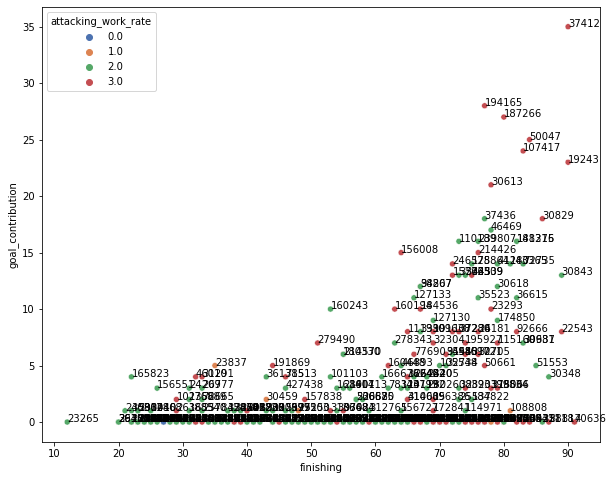

In [26]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=players,x="finishing",y="goal_contribution",hue="attacking_work_rate",palette="deep")
for i in range(len(players)):
    plt.text(x=players["finishing"][i],y=players["goal_contribution"][i],s=players["player_id"][i])

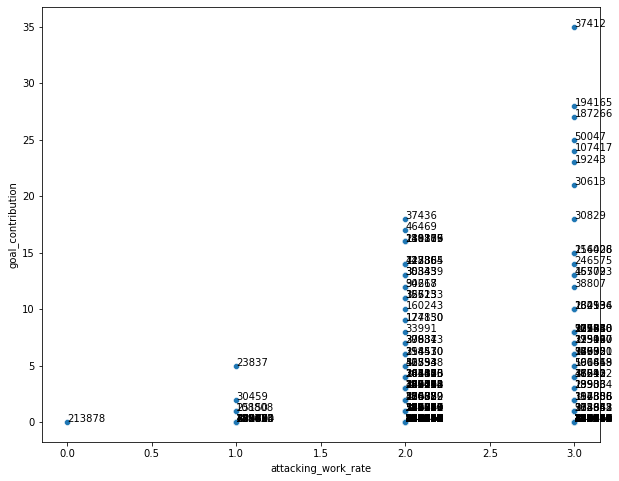

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=players,x="attacking_work_rate",y="goal_contribution")
for i in range(len(players)):
    plt.text(x=players["attacking_work_rate"][i],y=players["goal_contribution"][i],s=players["player_id"][i])

From the above 2 chart we can see players with higher attacking work rate have high goal contribution

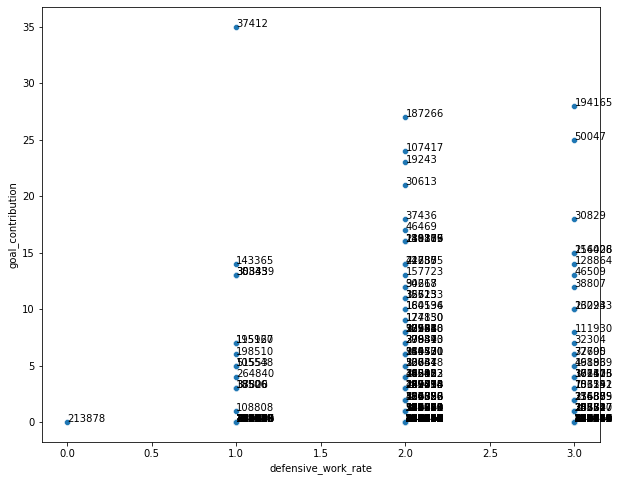

In [28]:
players["goal_contribution"]=players["no_of_goals"]+players["no_of_assists"]
plt.figure(figsize=(10,8))
sns.scatterplot(data=players,x="defensive_work_rate",y="goal_contribution")
for i in range(len(players)):
    plt.text(x=players["defensive_work_rate"][i],y=players["goal_contribution"][i],s=players["player_id"][i])

In this chart we can see that players having high defensive work rate aswell as high goal contribution.

In [29]:
#As there is just one player having very high goals contribution and low defensive work rate adding that player to most valueable players.
most_valuable=[37412]

### Filtering players with high attacking and defensive work rate 

In [30]:
top_df=players[(players["attacking_work_rate"]>=2) & (players["defensive_work_rate"]>=2)].reset_index()

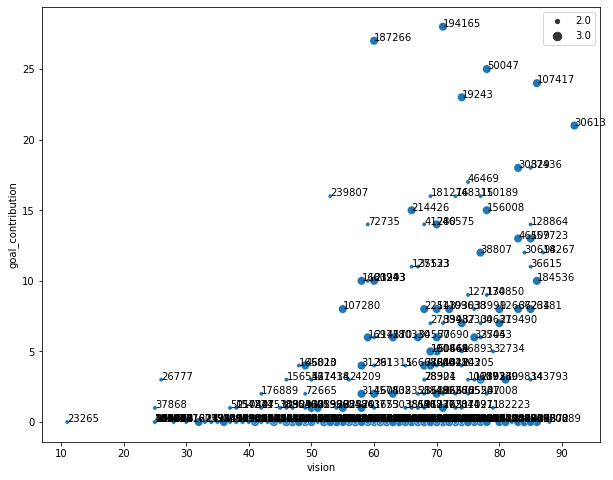

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=top_df,x="vision",y="goal_contribution",size="attacking_work_rate",palette="deep")
for i in range(len(top_df)):
    plt.text(x=top_df["vision"][i],y=top_df["goal_contribution"][i],s=top_df["player_id"][i])
    
plt.legend()

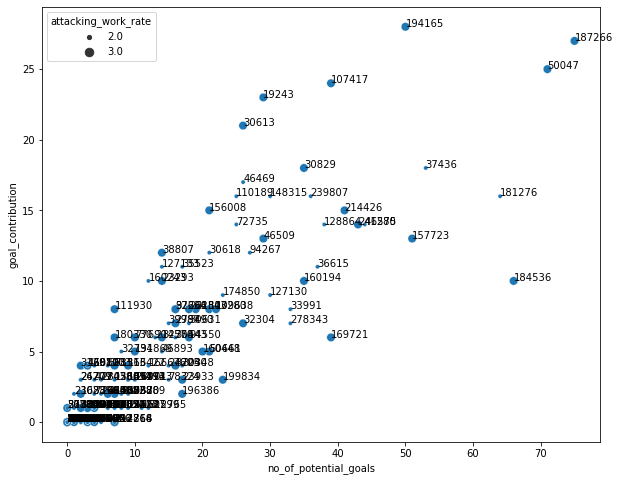

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=top_df,x="no_of_potential_goals",y="goal_contribution",size="attacking_work_rate",palette="deep")
for i in range(len(top_df)):
    plt.text(x=top_df["no_of_potential_goals"][i],y=top_df["goal_contribution"][i],s=top_df["player_id"][i])

In [33]:
a=list(top_df.sort_values("goal_contribution", ascending=False)["player_id"].head(9))

In [34]:
for i in a:
    most_valuable.append(i)

most_valuable

[37412, 194165, 187266, 50047, 107417, 19243, 30613, 30829, 37436, 46469]

### Filtering players with high attacking work rate and low defensive work rate and 0 contribution in goals as these players are not contributing either in goals or defense. 

In [35]:
worst_df=players[(players["goal_contribution"]==0) &(players["attacking_work_rate"]>2) & (players["defensive_work_rate"]<=1)].reset_index()

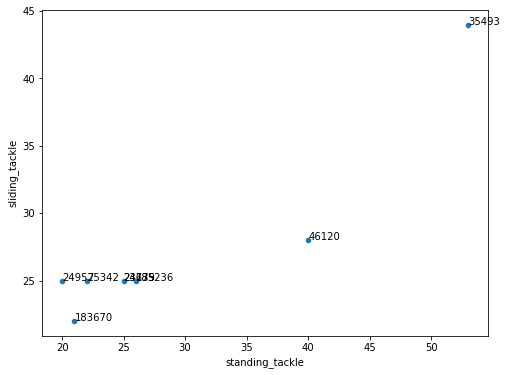

In [36]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=worst_df,x="standing_tackle",y="sliding_tackle")
for i in range(len(worst_df)):
    plt.text(x=worst_df["standing_tackle"][i],y=worst_df["sliding_tackle"][i],s=worst_df["player_id"][i])

In the above chart we can see 7 of the 8 players have 0 goals and there contribution in defense is also minimal.

In [37]:
least_valuable=[]
b=list(worst_df["player_id"])
for i in b:
    least_valuable.append(i)
least_valuable

[23779, 24635, 24952, 35493, 46120, 75342, 183670, 185236]

In [38]:
least_valuable.remove(35493)
print(least_valuable)
len(least_valuable)

[23779, 24635, 24952, 46120, 75342, 183670, 185236]


7

#### As we need 3 more players for the list extending the filter to bit lower attacking work rate

In [39]:
df=players[(players["goal_contribution"]==0) &(players["attacking_work_rate"]==2) & (players["defensive_work_rate"]<=1)].reset_index()

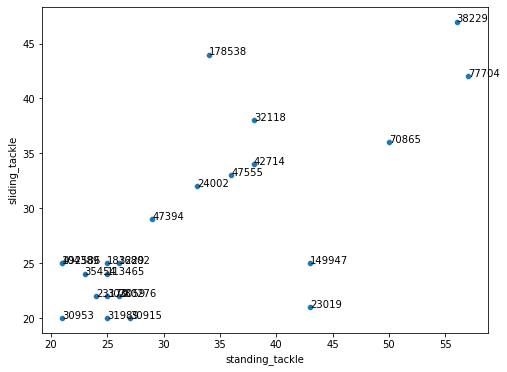

In [40]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x="standing_tackle",y="sliding_tackle",palette="deep")
for i in range(len(df)):
    plt.text(x=df["standing_tackle"][i],y=df["sliding_tackle"][i],s=df["player_id"][i])

In [41]:
c=list(df.sort_values(["sliding_tackle","standing_tackle"])["player_id"].head(3))
for i in c:
    least_valuable.append(i)
least_valuable

[23779, 24635, 24952, 46120, 75342, 183670, 185236, 30953, 31989, 30915]

# My most valuable players and least valuable players are completly based on goals contribution

In [42]:
results={"most_valuable":most_valuable,"least_valuable":least_valuable}
results=pd.DataFrame(results)
results

,most_valuable,least_valuable
0,37412,23779
1,194165,24635
2,187266,24952
3,50047,46120
4,107417,75342
5,19243,183670
6,30613,185236
7,30829,30953
8,37436,31989
9,46469,30915


In [43]:
results.to_csv("player_list_submission.csv", index=False)